## Spotify Top Hit Playlist (2010-2020) Analysis
This notebook does the following:

- Uses the count_genres function from lib.py file to count number of genres an artist plays
- Displays descriptive analysis for the selected columns 
- Analysis plots 
- Correlation plot of the different playlist variables 

Todo Later:
- Detailed analysis

### About the datasets
This dataset was extracted through Spotify API directly by https://www.kaggle.com/josephinelsy on 07/09/2023 on Kaggle and it contains information on songs/tracks (100 per year) from Top Hit playlists from 2010 to 2022 created by Spotify

In [52]:
# Best way to Import functions from the lib.py file to the notebook
%run ../utils/lib.py

In [53]:
# reading and manipulating data
import pandas as pd
import numpy as np
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=18)
pd.set_option('display.max_columns', None)
# Notebooks usually have a lot of warnings, so we can ignore them
import warnings
warnings.filterwarnings("ignore")

In [54]:
# read the dataset
spotify = pd.read_csv('../datasets/playlist_2010to2022.csv')

In [55]:
# drop the following columns
spotify = spotify.drop(['playlist_url', 'track_id', 'track_name', 'artist_id', 'album', 'artist_popularity', 'time_signature'], axis=1)

In [56]:
# Apply count_genres from lib.py
spotify['artist_genres'] = spotify['artist_genres'].apply(count_genres)

In [57]:
# check if the artist_genres column is now count of genres
spotify.head()

,year,track_popularity,artist_name,artist_genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,91,Coldplay,25,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0
1,2000,84,blink-182,82,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0
2,2000,69,Faith Hill,67,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0
3,2000,88,Linkin Park,69,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0
4,2000,74,*NSYNC,32,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0


In [58]:
# Apply convert_duration_ms_to_duration_m from lib.py
spotify['duration_m'] = spotify['duration_ms'].apply(convert_duration_ms_to_duration_m)
spotify = spotify.drop(['duration_ms'], axis=1) # drop the duration_ms column

In [59]:
selected_columns=['artist_genres', 'track_popularity', 'duration_m']

descriptive_stats = describe_selected_columns(spotify, selected_columns)

print(descriptive_stats)

       artist_genres  track_popularity  duration_m
count        2300.00           2300.00     2299.00
mean           43.52             70.94        3.77
std            27.22             12.29        0.70
min             2.00              0.00        1.62
25%            22.00             66.00        3.34
50%            40.00             72.00        3.69
75%            59.00             79.00        4.10
max           155.00            100.00       11.47


### Descriptive stats Insights 
The mean duration of tracks on the playlist is 3.77 minutes, with a standard deviation of 0.70 minutes. This suggests that most tracks on the playlist are of a similar length, but there is also a small amount of variation in track length.

Overall, the descriptive statistics suggest that the 2010-2022 Spotify playlist is a diverse mix of tracks, with a variety of artist genres, popularity levels, and durations.

It is also interesting to note that the median (50th percentile) for `track_popularity` is slightly higher than the mean. This suggests that the distribution of values for it is skewed to the right, meaning that there are more tracks with higher values for these variable than there are tracks with lower values.

This could be due to a number of factors, such as the fact that more popular artists are more likely to have their tracks included on playlists

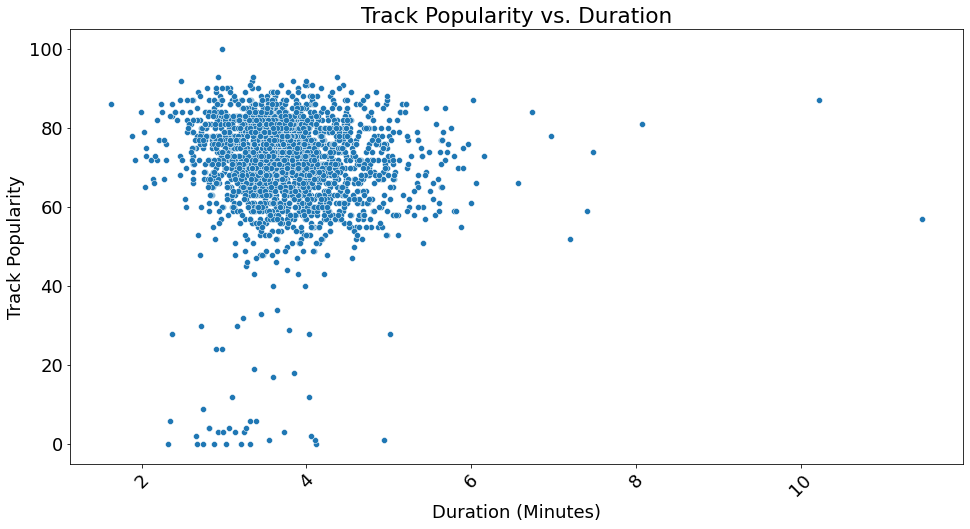

In [61]:
spotify['artist_genres'] = spotify['artist_genres'].astype(str)

plt.figure(figsize=(16,8))
sns.scatterplot(
    x='duration_m',
    y='track_popularity',
    #hue='artist_genres',
    data=spotify,
)

plt.title('Track Popularity vs. Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Track Popularity')

plt.xticks(rotation=45)

# Save the plot to the plots folder
plt.savefig('../plots/track_popularity_vs_duration.png')
